In [21]:
import pickle
import seaborn as sns
import pandas as pd


do = 'High-overlap'
layer = 1
debug = False

evaluation_path = f'../pickles/evaluations/topk_{do}_L{layer}.pickle'
 

with open(evaluation_path, 'rb') as handle: 
  evaluations = pickle.load(handle)
  

In [22]:
evaluations

{0.01: {'entailed': {'lexical_overlap': 0.9926,
   'subsequence': 0.9968,
   'constituent': 0.9884},
  'non-entailed': {'lexical_overlap': 0.1628,
   'subsequence': 0.0422,
   'constituent': 0.1302}},
 0.02: {'entailed': {'lexical_overlap': 0.9842,
   'subsequence': 0.9918,
   'constituent': 0.9848},
  'non-entailed': {'lexical_overlap': 0.1686,
   'subsequence': 0.0526,
   'constituent': 0.1282}},
 0.03: {'entailed': {'lexical_overlap': 0.981,
   'subsequence': 0.991,
   'constituent': 0.9886},
  'non-entailed': {'lexical_overlap': 0.1814,
   'subsequence': 0.0498,
   'constituent': 0.1338}},
 0.04: {'entailed': {'lexical_overlap': 0.984,
   'subsequence': 0.9988,
   'constituent': 0.9958},
  'non-entailed': {'lexical_overlap': 0.206,
   'subsequence': 0.0412,
   'constituent': 0.1514}},
 0.05: {'entailed': {'lexical_overlap': 0.9882,
   'subsequence': 0.9898,
   'constituent': 0.9958},
  'non-entailed': {'lexical_overlap': 0.1866,
   'subsequence': 0.031,
   'constituent': 0.1502}}}

In [42]:
all_tops =  []
metrices = []
classes = []
scores = []

for topk in evaluations.keys():
    for cur_class in evaluations[topk].keys():
        for heuristic in evaluations[topk][cur_class].keys():

            all_tops.append(topk)
            classes.append(cur_class)
            metrices.append(heuristic)
            scores.append(evaluations[topk][cur_class][heuristic])      

In [43]:
df = pd.DataFrame()
df['TopK'] = all_tops
df['Classes'] = classes
df['Metrics'] = metrices
df['Scores'] = scores

In [44]:
df.head()

,TopK,Classes,Metrics,Scores
0,0.01,entailed,lexical_overlap,0.9926
1,0.01,entailed,subsequence,0.9968
2,0.01,entailed,constituent,0.9884
3,0.01,non-entailed,lexical_overlap,0.1628
4,0.01,non-entailed,subsequence,0.0422


In [45]:
sns.lineplot(data=fmri, x="timepoint", y="signal", )

(30, 4)

<AxesSubplot: xlabel='TopK', ylabel='Scores'>

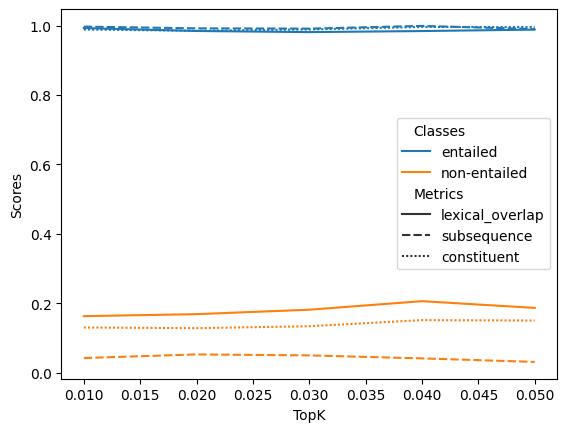

In [46]:
sns.lineplot(data=df, x="TopK", y="Scores", hue="Classes", style="Metrics")